# Building a model for Network Intrusion Detection!

### Install and import all libraries for the Intrusion Detection Model

In [144]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [145]:
# Load the training dataset
train_data = pd.read_csv(r"C:\Users\berna\Downloads\Datasets\Cyber detection datasets\train_data.csv")

In [146]:
# View the training dataset
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [147]:
# Load the testing dataset
test_data = pd.read_csv(r"C:\Users\berna\Downloads\Datasets\Cyber detection datasets\test_data.csv")

In [148]:
# View the training dataset
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [149]:
# Check for distribution of the class label
train_data['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [150]:
# View information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [151]:
# Display description for the numeric columns in the dataset
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [153]:
# Display description for the non-numeric columns in the dataset
train_data.describe(include='object').transpose()

,count,unique,top,freq
protocol_type,25192,3,tcp,20526
service,25192,66,http,8003
flag,25192,11,SF,14973
class,25192,2,normal,13449


In [154]:
# Check for missing values
train_data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [155]:
# Check for duplicate rows
total = train_data.shape[0]
missing_columns = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [156]:
# print information for duplicate records
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

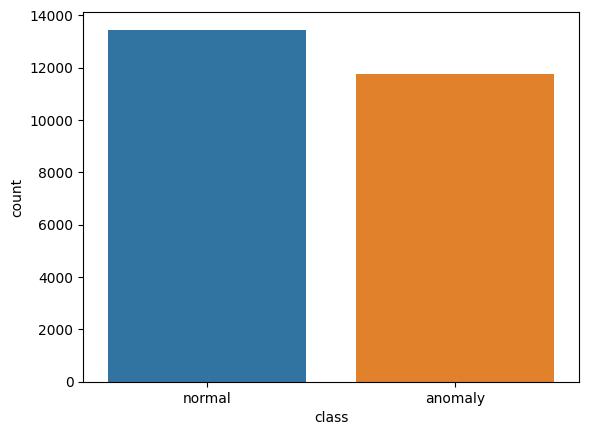

In [157]:
# Plot a bar chart for class label
sns.countplot(x=train_data['class'])

In [158]:
# Create function for encoding non-numeric column
def le(df):
    for col in df.columns:
        if df[col].dtype == "object":
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

In [159]:
# Apply function to training and testing dataset
le(train_data)
le(test_data)

In [108]:
# Drop column
# train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
# test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [160]:
# Identify features and target for model
X = train_data.drop(['class'], axis=1)
Y = train_data['class']

In [110]:
# rfc = RandomForestClassifier()

# rfe = RFE(rfc, n_features_to_select=10)
# rfe = rfe.fit(x_train, y_train)

# feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
# selected_features = [v for i, v in feature_map if i==True]

In [111]:
#selected_features

In [112]:
#x_train = x_train[selected_features]

In [163]:
# Standardize training dataset values for model
scale = StandardScaler()
X =scale.fit_transform(X)

In [164]:
# Standardize testing dataset values for model
test_data = scale.fit_transform(test_data)

In [165]:
# Split dataset for training and testing the model
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=2)

In [166]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(7558, 41)
(17634, 41)
(7558,)
(17634,)


In [167]:
# Import time to calculate model, training and testing run time
import time

In [198]:
# Initialize and train model-showing run time
lg_model = LogisticRegression(max_iter=1200000, random_state=42)
start_time = time.time()
lg_model.fit(x_train, y_train.values.ravel())
end_time = time.time()
print(('Training time:', end_time-start_time))

('Training time:', 0.32428717613220215)


In [204]:
# Show run time for predicting or testing
start_time = time.time()
Y_pred_lg = lg_model.predict(x_test)
end_time = time.time()
print(('Testing time:', end_time-start_time))

('Testing time:', 0.0019631385803222656)


In [201]:
# Checking accuracy score for training and testing dataset
lg_train, lg_test = lg_model.score(x_train, y_train), lg_model.score(x_test, y_test)

In [202]:
print(f"Training Score: {lg_train}")
print(f"Testing Score: {lg_test}")

Training Score: 0.9547465124191902
Testing Score: 0.9558084149245832


### Hyperparameter framework

In [123]:
#%pip install optuna

In [124]:
# def objective(trial):
    # n_neighbors = trial.suggest_int('KNN-n_neighbors', 2, 16, log=False)


In [203]:
# Initialize and train model-showing run time
dt_model = DecisionTreeClassifier()
start_time = time.time()
dt_model.fit(x_train, y_train.values.ravel())
end_time = time.time()
print(('Training time:', end_time-start_time))

('Training time:', 0.11916732788085938)


In [214]:

# Show run time for predicting or testing
start_time = time.time()
Y_pred_dt = dt_model.predict(x_test)
end_time = time.time()
print(('Testing time:', end_time-start_time))

('Testing time:', 0.003000974655151367)


In [210]:
# Checking accuracy score for training and testing dataset
dt_train, dt_test = dt_model.score(x_train, y_train), dt_model.score(x_test, y_test)

In [212]:
print(f"Training Score: {dt_train}")
print(f"Testing Score: {dt_test}")

Training Score: 1.0
Testing Score: 0.9936491135220958


In [213]:
# Initialize and train model-showing run time
knn_model = KNeighborsClassifier()
start_time = time.time()
knn_model.fit(x_train, y_train.values.ravel())
end_time = time.time()
print(('Training time:', end_time-start_time))

('Training time:', 0.00920867919921875)


In [215]:
# Show run time for predicting or testing
start_time = time.time()
Y_pred_knn = knn_model.predict(x_test)
end_time = time.time()
print(('Testing time:', end_time-start_time))

('Testing time:', 0.25626540184020996)


In [217]:
# Checking accuracy score for training and testing dataset
knn_train, knn_test = knn_model.score(x_train, y_train), knn_model.score(x_test, y_test)

In [218]:
print(f"Training Score: {knn_train}")
print(f"Testing Score: {knn_test}")


Training Score: 0.9936486333219916
Testing Score: 0.990209050013231


In [219]:
# Initialize confusion matrix
cm = confusion_matrix

In [223]:
# Show Confusion matrix for models
print('Confusion Matrix_Logistics Regression:\n', cm(y_test, Y_pred_lg))
print('Confusion Matrix_Decision Tree:\n', cm(y_test, Y_pred_dt))
print('Confusion Matrix_KNearest Neighbor:\n', cm(y_test, Y_pred_knn))

Confusion Matrix_Logistics Regression:
 [[3301  197]
 [ 137 3923]]
Confusion Matrix_Decision Tree:
 [[3476   22]
 [  26 4034]]
Confusion Matrix_KNearest Neighbor:
 [[3462   36]
 [  38 4022]]


In [225]:
# Show Classification report for the models
lg_cr = classification_report(y_test, Y_pred_lg)
dt_cr = classification_report(y_test, Y_pred_dt)
knn_cr = classification_report(y_test, Y_pred_knn)

In [226]:
# Display Classification reports for all models
print("*******Logistics Regression******* \n", lg_cr)
print("*******Decision Tree******* \n", dt_cr)
print("*******KNearest Neighbors******* \n", knn_cr)

*******Logistics Regression******* 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3498
           1       0.95      0.97      0.96      4060

    accuracy                           0.96      7558
   macro avg       0.96      0.95      0.96      7558
weighted avg       0.96      0.96      0.96      7558

*******Decision Tree******* 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

*******KNearest Neighbors******* 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99   